# Problem 1 : Data Overview

## 1.1.A Import the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## 1.1.B Load the data

In [2]:
df = pd.read_csv('austo_automobile.csv')

In [106]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1.1.C Check the Structure of the data

In [3]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [5]:
print("The structure of the data is as follows:")
print("The number of rows and columns are:", df.shape)

The structure of the data is as follows:
The number of rows and columns are: (1581, 14)


## 1.1.D Check the types of the data

In [6]:
print("The types of the data are as follows:")
df.info()

The types of the data are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


## 1.1.E Check for and treat (if needed) missing values

### Step 1: Check for missing values

In [7]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### there are 53 missing values in Gender and 106 missing values in Partner Salary

### Step 2: Handle missing values in Gender using mode as it is a categorical variable

In [8]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])

### Step 3: Handle missing values in Partner_working using conditions and correlation

In [9]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


From the above result, we can see that the salary variables (Salary, Partner Salary and Total Salary) are correlated.

The total salary = Salary + Partner Salary

Also there is a flag variable for Partner Working which can be used to determine the partner salary value

In [10]:
df.Partner_working.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df.loc[df['Partner_working'] == 'Yes', 'Partner_salary'] = df.Total_salary - df.Salary
df.loc[df['Partner_working'] == 'No', 'Partner_salary'] = 0

In [12]:
#check for any more missing columns
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

All the missing values have been treated

## 1.1.F Check the statistical summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


## 1.1.G Check for and treat (if needed) data irregularities

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


lets check the value counts of all categorical variables

In [15]:
df.Gender.value_counts()

Male      1252
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [16]:
df.Profession.value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In [17]:
df.Marital_status.value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [18]:
df.Education.value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [19]:
df.Personal_loan.value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [20]:
df.House_loan.value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [21]:
df.Partner_working.value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [22]:
df.Make.value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

Based on the above, we need to treat the Gender Variable as it contains spelling mistakes or wrong entries. Other variables are fine

In [23]:
# Treat data irregularities
df.Gender.replace(to_replace='Femal', value='Female', inplace=True)
df.Gender.replace(to_replace='Femle', value='Female', inplace=True)

In [24]:
df.Gender.value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

### Check for numerical variables irregularities

<Axes: xlabel='Age'>

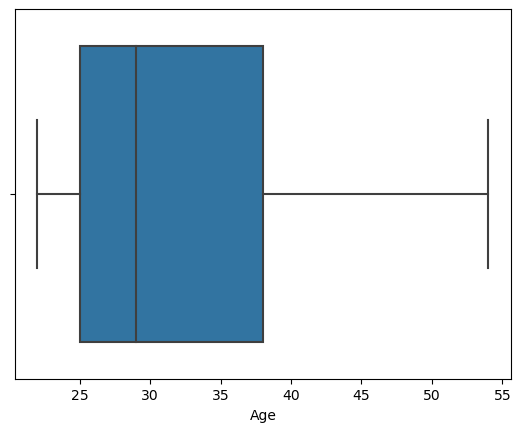

In [25]:
sns.boxplot(data=df,x='Age')

<Axes: xlabel='No_of_Dependents'>

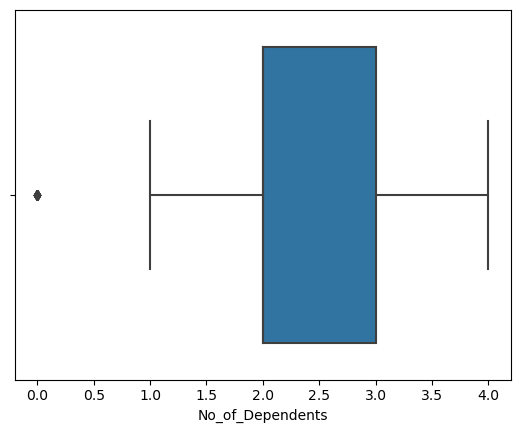

In [26]:
sns.boxplot(data=df,x='No_of_Dependents')

0 cannot be cosidered as an outlier here

<Axes: xlabel='Salary'>

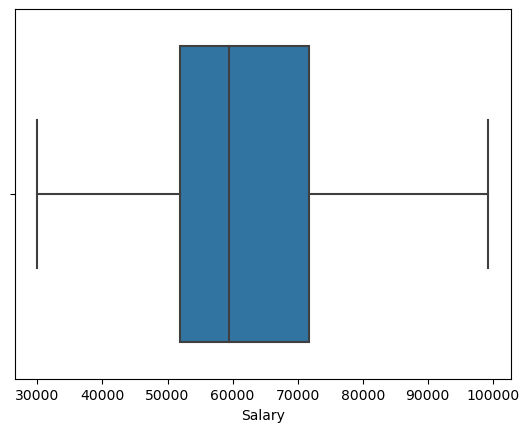

In [27]:
sns.boxplot(data=df,x='Salary')

<Axes: xlabel='Partner_salary'>

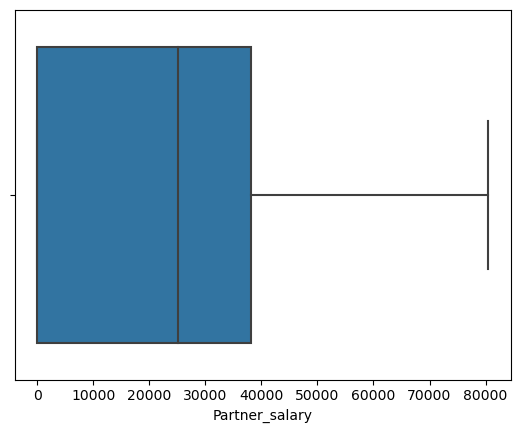

In [28]:
sns.boxplot(data=df,x='Partner_salary')

<Axes: xlabel='Price'>

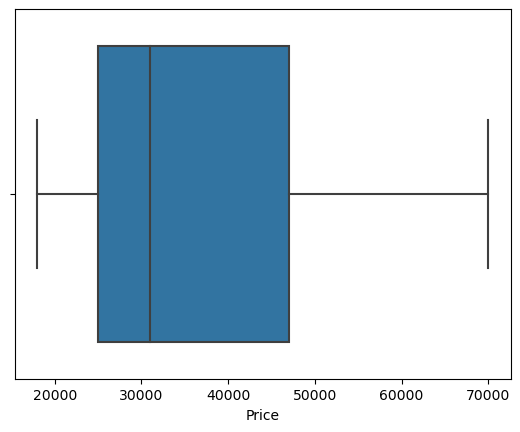

In [29]:
sns.boxplot(data=df,x='Price')

<Axes: xlabel='Total_salary'>

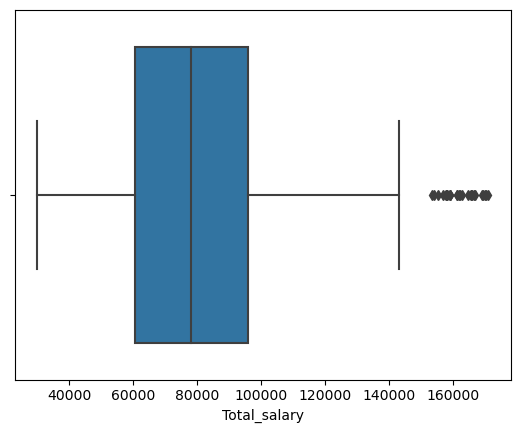

In [30]:
sns.boxplot(data=df,x='Total_salary')

Outliers are present only in the Total Salary variable as seen in the above box plot.

In [31]:
df_new=df.copy()

In [32]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [33]:
lr,ur=detect_outlier(df_new['Total_salary'])
print("lower range",lr,"and upper range",ur)

lower range 7400.0 and upper range 149000.0


In [34]:
df_new['Total_salary']=np.where(df_new['Total_salary']>ur,ur,df_new['Total_salary'])
df_new['Total_salary']=np.where(df_new['Total_salary']<lr,lr,df_new['Total_salary'])

<Axes: xlabel='Total_salary'>

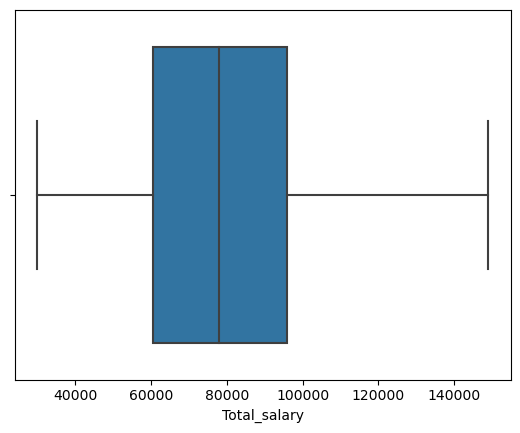

In [35]:
sns.boxplot(x=df_new.Total_salary)

All the outliers are removed as per the above figure

# Problem1 - Univariate Analysis

## 1.2.A Explore all the variables (categorical and numerical) in the data

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 173.1+ KB


### We will use df_new as the dataset as it is free of outliers and other discrepancies

### Univariate analysis of Numerical variables

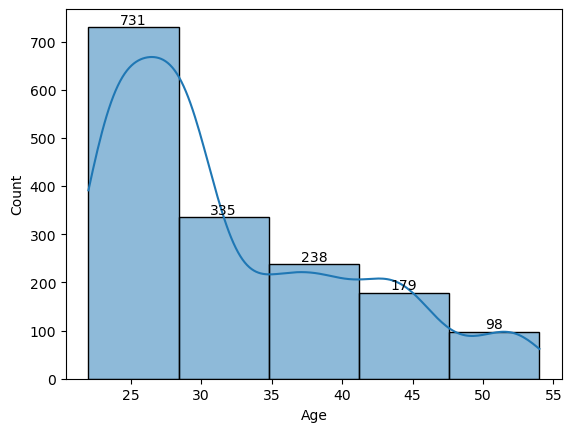

In [44]:
ax=sns.histplot(x=df_new.Age,bins=5,kde=True)
for i in ax.containers:
    ax.bar_label(i,)

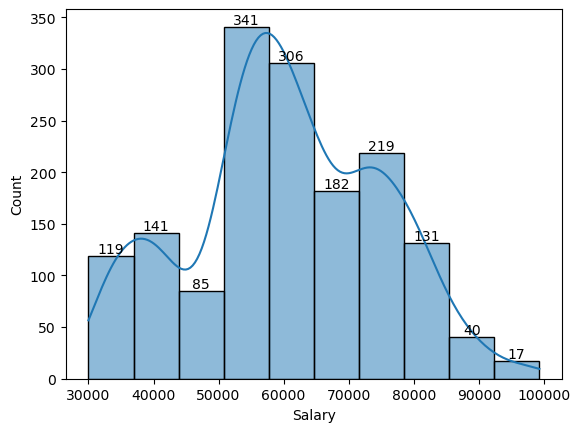

In [45]:
ax=sns.histplot(x=df_new.Salary,bins=10,kde=True)
for i in ax.containers:
    ax.bar_label(i,)

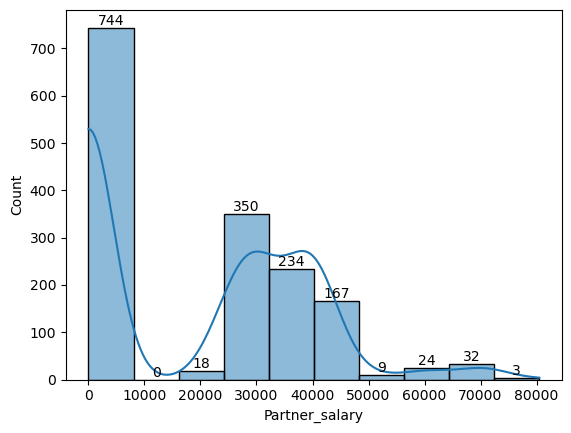

In [46]:
ax=sns.histplot(x=df_new.Partner_salary,bins=10,kde=True)
for i in ax.containers:
    ax.bar_label(i,)

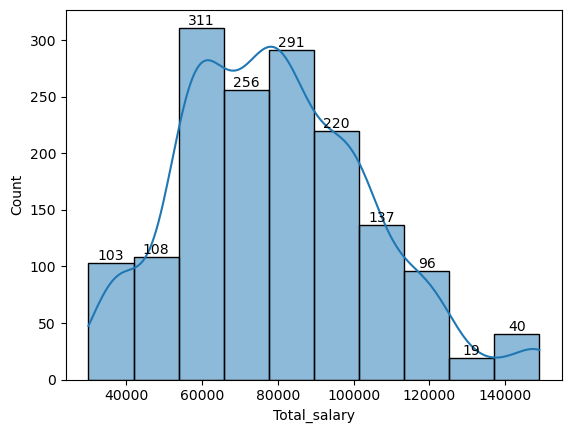

In [47]:
ax=sns.histplot(x=df_new.Total_salary,bins=10,kde=True)
for i in ax.containers:
    ax.bar_label(i,)

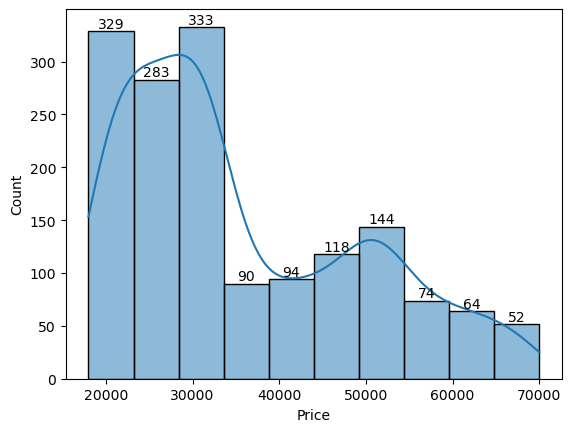

In [48]:
ax=sns.histplot(x=df_new.Price,bins=10,kde=True)
for i in ax.containers:
    ax.bar_label(i,)

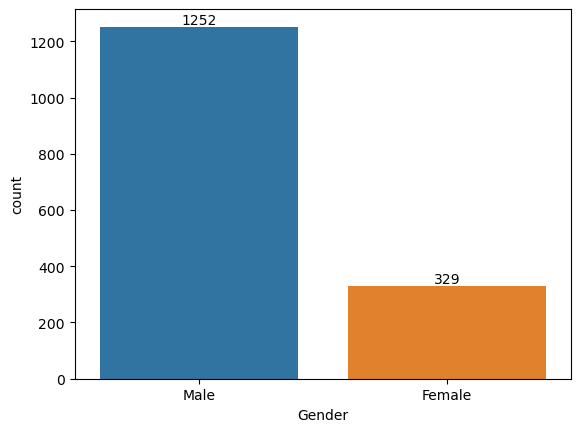

In [49]:
ax=sns.countplot(x=df_new.Gender)
for i in ax.containers:
    ax.bar_label(i,)

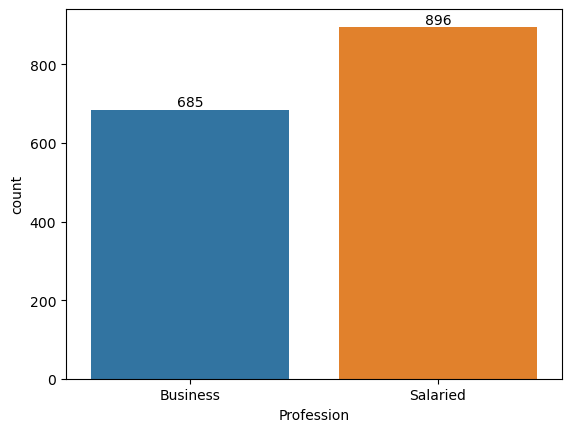

In [50]:
ax=sns.countplot(x=df_new.Profession)
for i in ax.containers:
    ax.bar_label(i,)

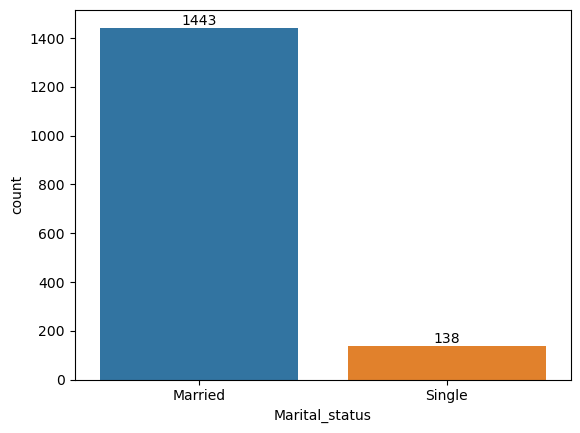

In [51]:
ax=sns.countplot(x=df_new.Marital_status)
for i in ax.containers:
    ax.bar_label(i,)

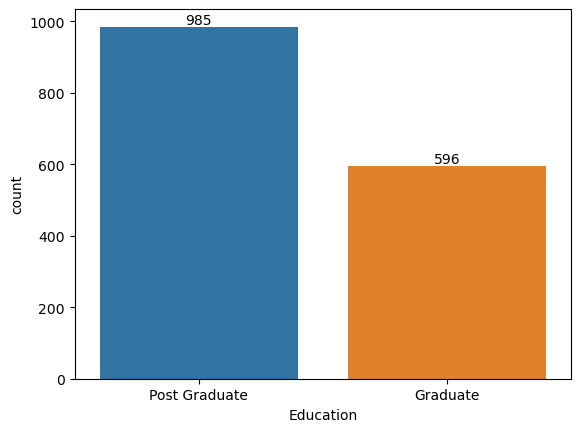

In [54]:
ax=sns.countplot(x=df_new.Education)
for i in ax.containers:
    ax.bar_label(i,)

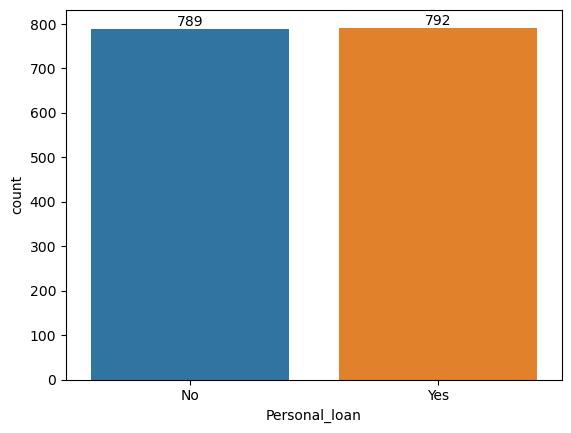

In [55]:
ax=sns.countplot(x=df_new.Personal_loan)
for i in ax.containers:
    ax.bar_label(i,)

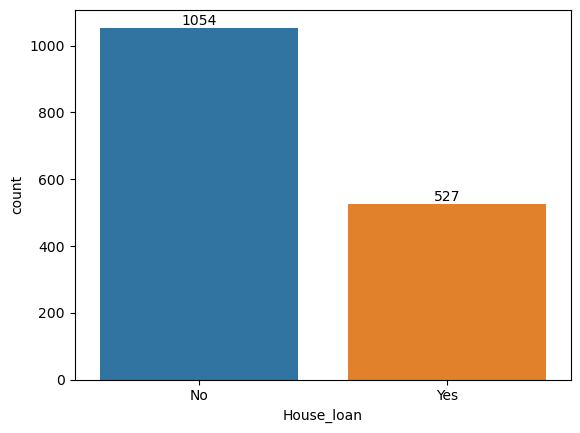

In [56]:
ax=sns.countplot(x=df_new.House_loan)
for i in ax.containers:
    ax.bar_label(i,)

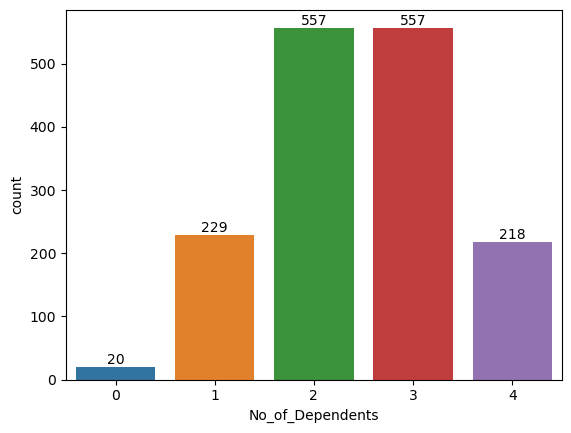

In [57]:
ax=sns.countplot(x=df_new.No_of_Dependents)
for i in ax.containers:
    ax.bar_label(i,)

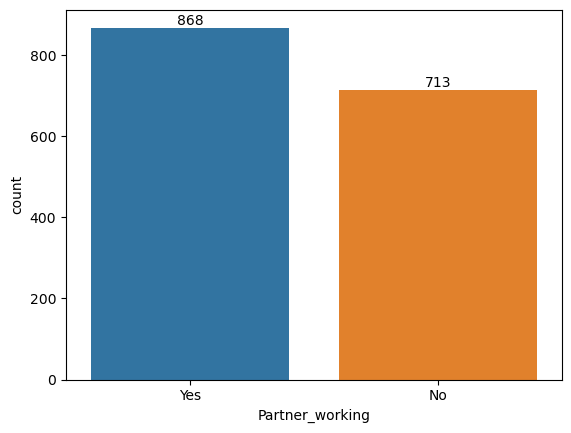

In [58]:
ax=sns.countplot(x=df_new.Partner_working)
for i in ax.containers:
    ax.bar_label(i,)

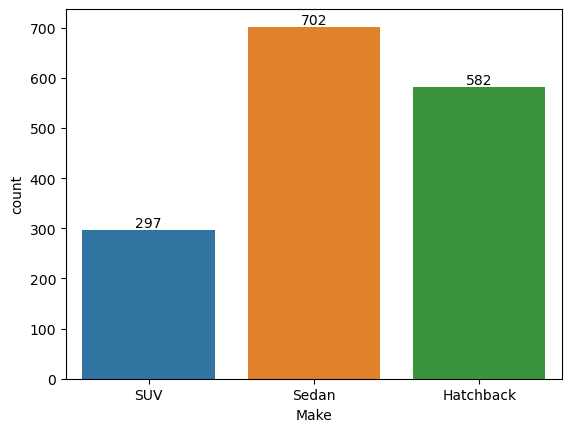

In [59]:
ax=sns.countplot(x=df_new.Make)
for i in ax.containers:
    ax.bar_label(i,)

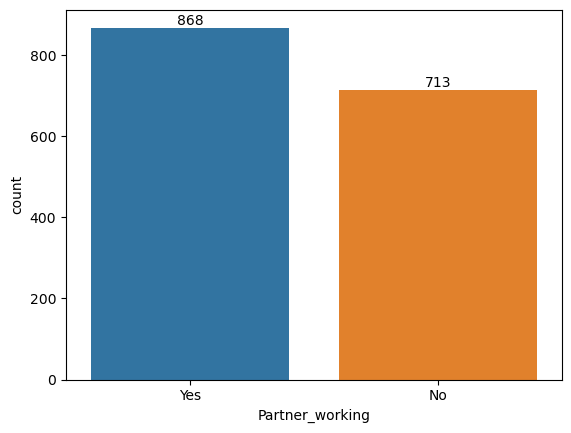

In [107]:
ax=sns.countplot(x=df_new.Partner_working)
for i in ax.containers:
    ax.bar_label(i,)

### Problem1 - Bivariate Analysis

### 1.3.A Explore the relationship between all numerical variables

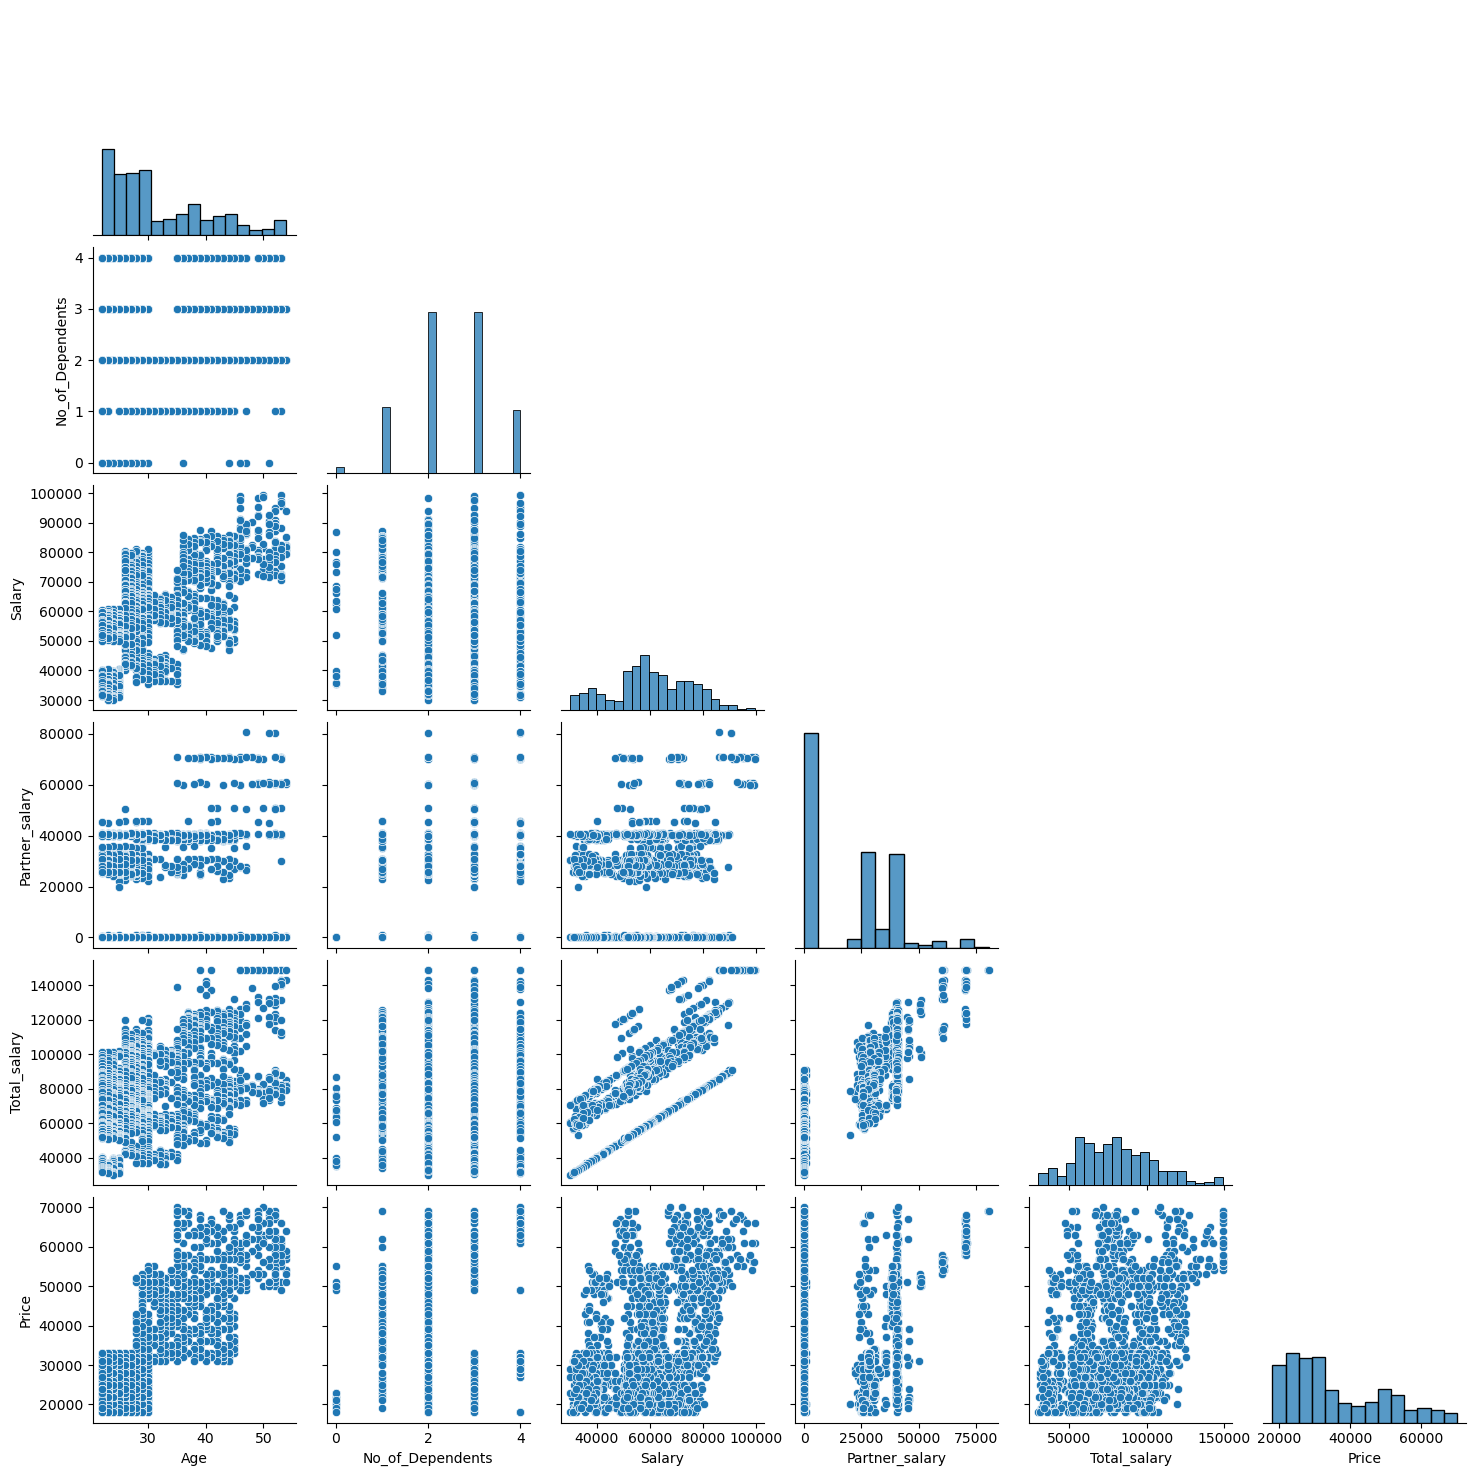

In [115]:
sns.pairplot(data=df_new,corner=True);

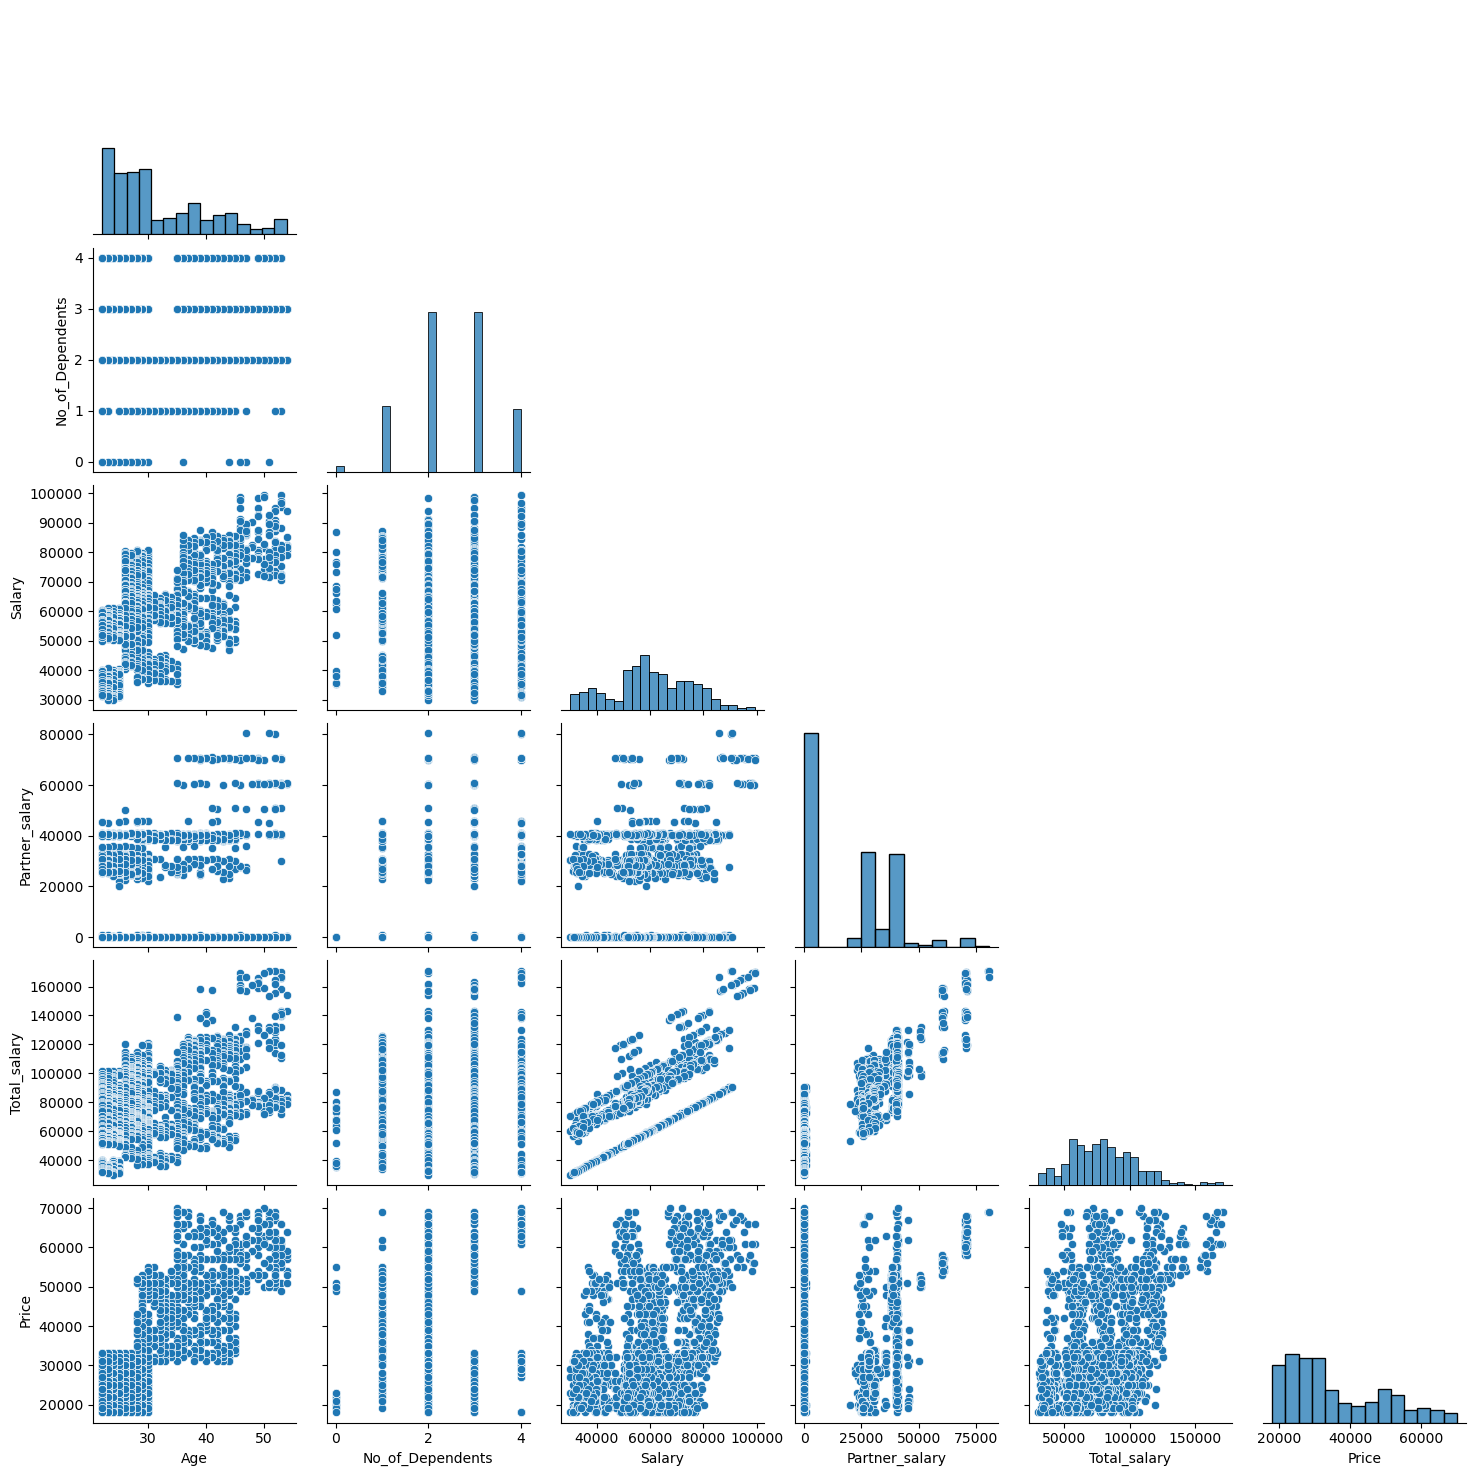

In [114]:
sns.pairplot(data=df,corner=True);

### 1.3.B Explore the correlation between all numerical variables

C:\Users\91779\AppData\Local\Temp\ipykernel_18564\4279665516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f");


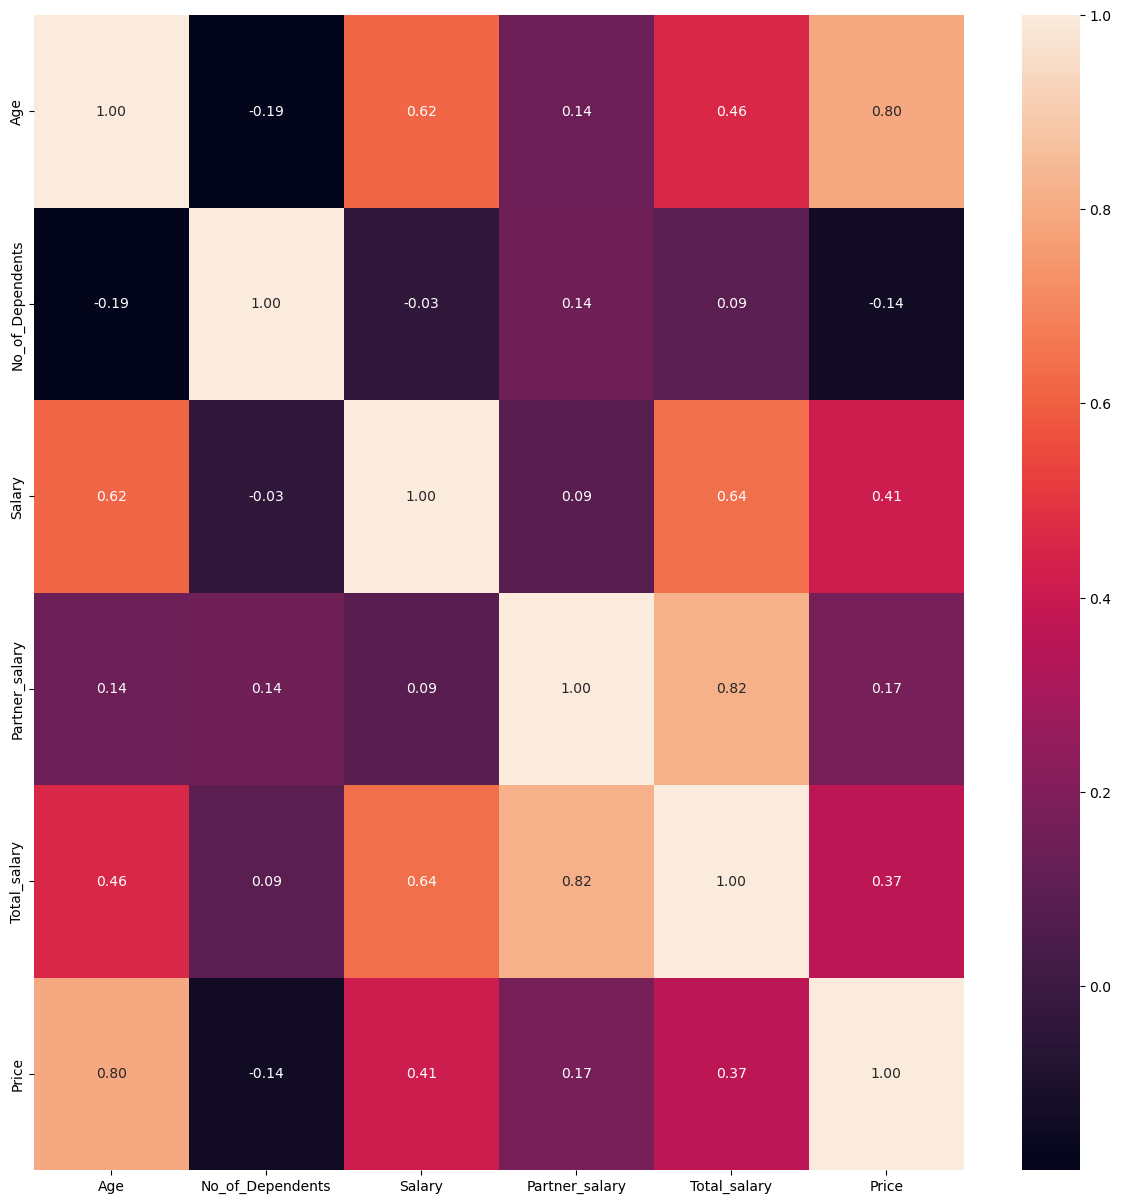

In [117]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

C:\Users\91779\AppData\Local\Temp\ipykernel_18564\1032379166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True,fmt=".2f");


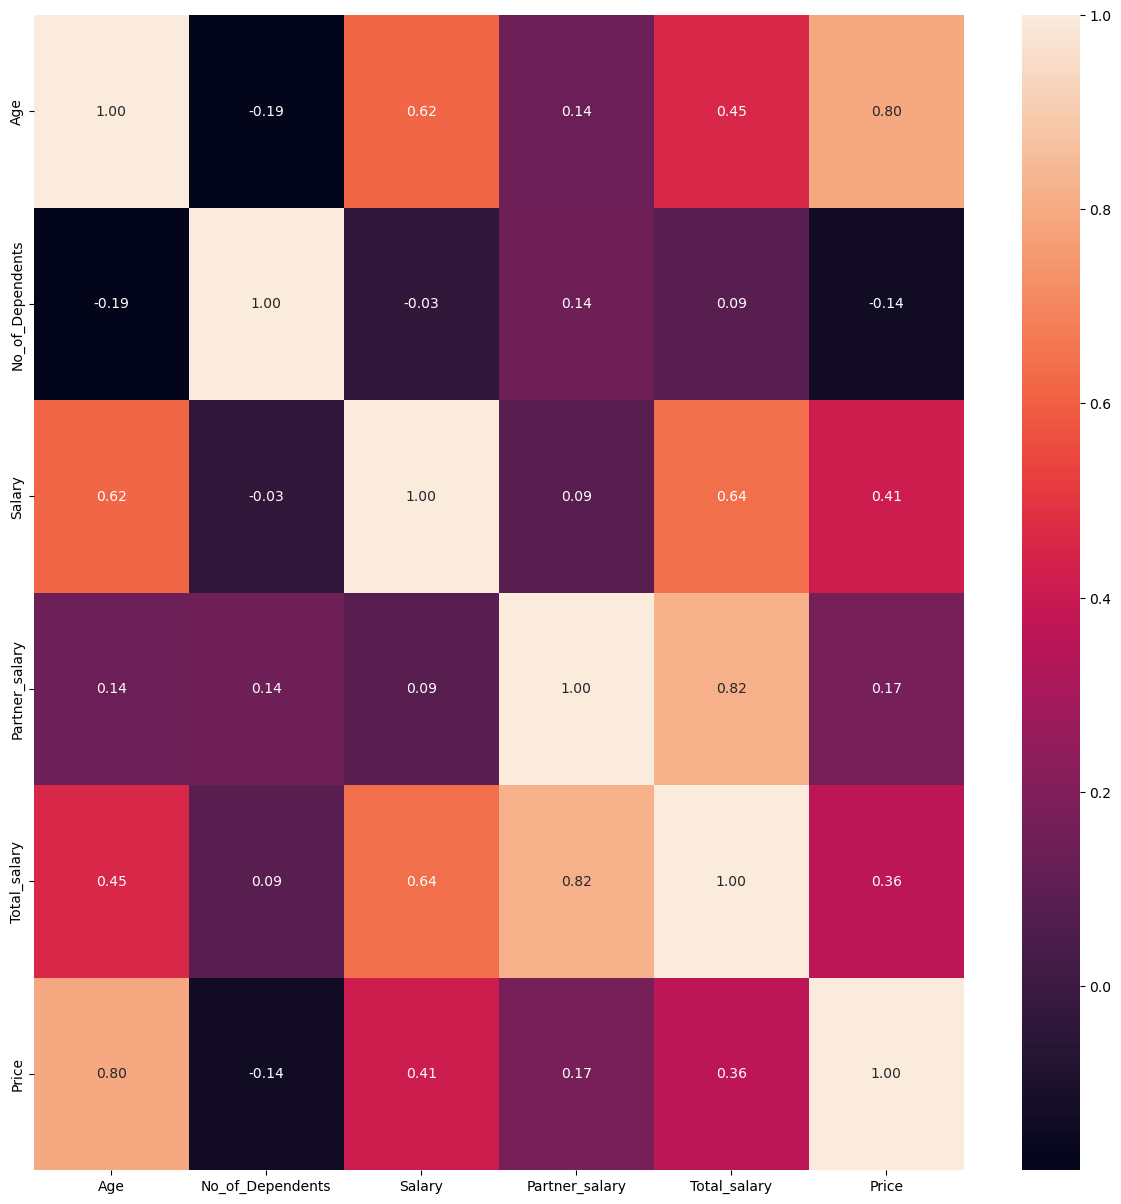

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),annot=True,fmt=".2f");

### 1.3.C Explore the relationship between categorical vs numerical variables

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


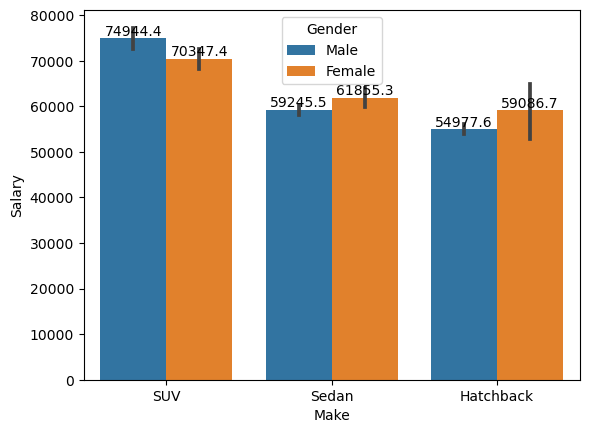

In [64]:
ax=sns.barplot(x=df_new.Make,y=df_new.Salary,hue=df_new.Gender)
for i in ax.containers:
    ax.bar_label(i,)

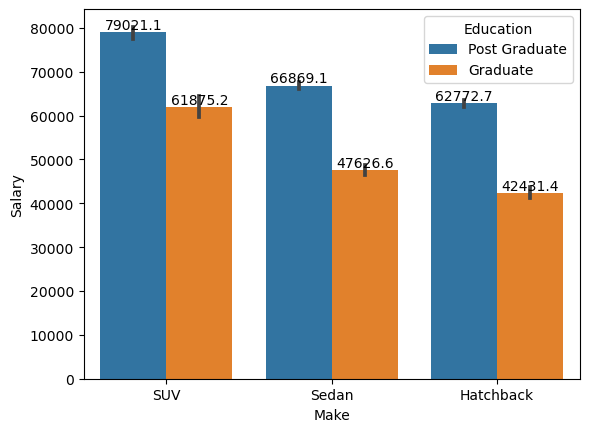

In [65]:
ax=sns.barplot(x=df_new.Make,y=df_new.Salary,hue=df.Education)
for i in ax.containers:
    ax.bar_label(i,)

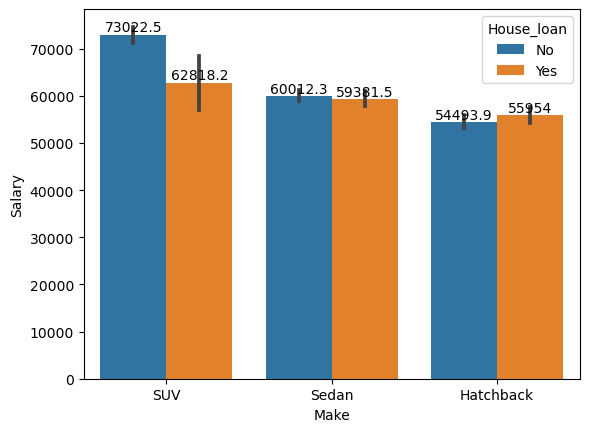

In [66]:
ax=sns.barplot(x=df_new.Make,y=df_new.Salary,hue=df.House_loan)
for i in ax.containers:
    ax.bar_label(i,)

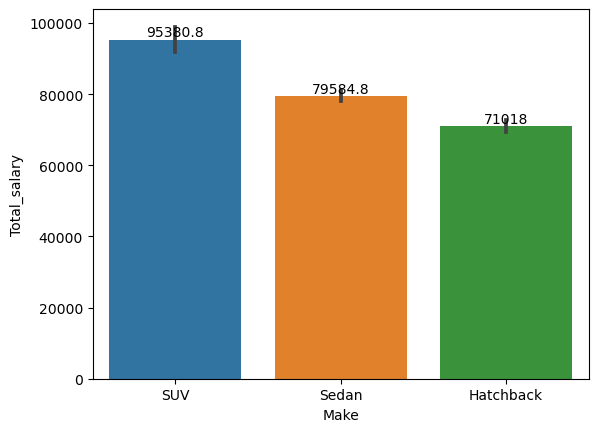

In [67]:
ax=sns.barplot(x=df_new.Make,y=df_new.Total_salary)
for i in ax.containers:
    ax.bar_label(i,)

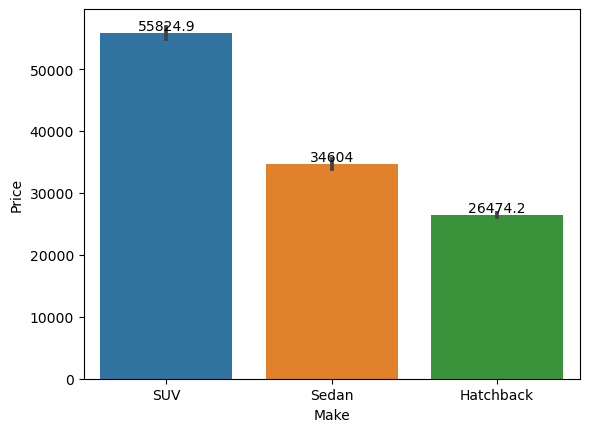

In [68]:
ax=sns.barplot(x=df_new.Make,y=df_new.Price)
for i in ax.containers:
    ax.bar_label(i,)

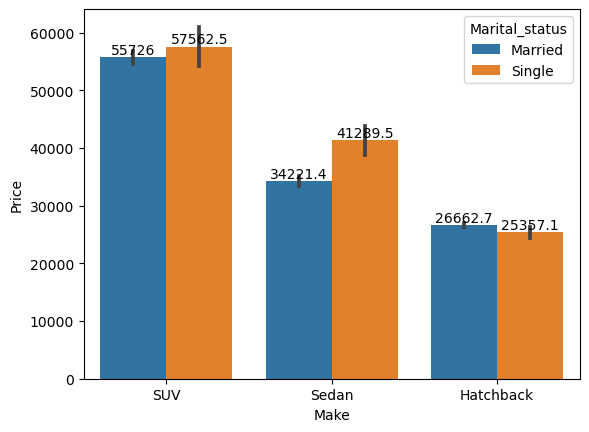

In [69]:
ax=sns.barplot(x=df_new.Make,y=df_new.Price,hue=df.Marital_status)
for i in ax.containers:
    ax.bar_label(i,)

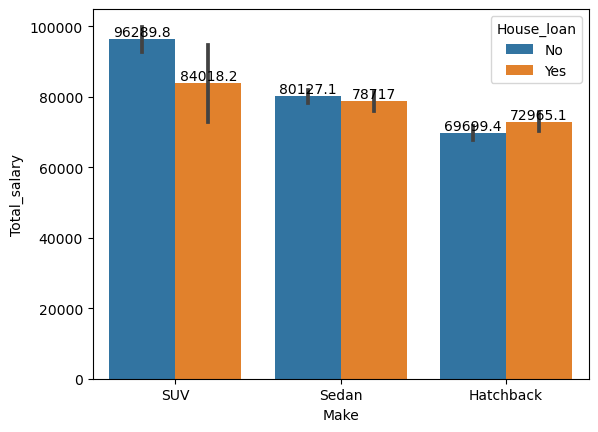

In [70]:
ax=sns.barplot(x=df_new.Make,y=df_new.Total_salary,hue=df.House_loan)
for i in ax.containers:
    ax.bar_label(i,)

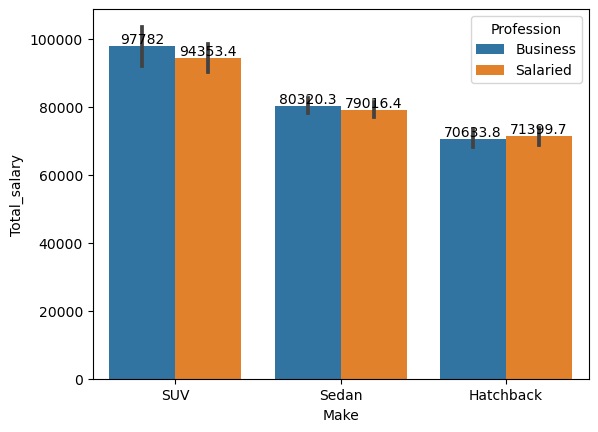

In [71]:
ax=sns.barplot(x=df_new.Make,y=df_new.Total_salary,hue=df.Profession)
for i in ax.containers:
    ax.bar_label(i,)

### Problem1 - Key Questions

### 1.4.1 Do men tend to prefer SUVs more compared to women?

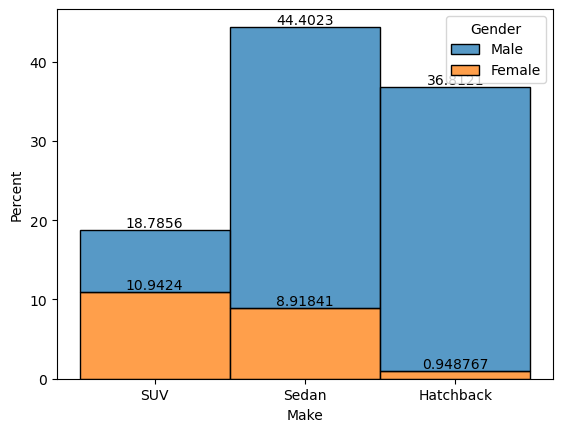

In [72]:
ax=sns.histplot(binwidth=0.5, x=df_new.Make, hue=df.Gender, data=df, stat="percent", multiple="stack")
for i in ax.containers:
    ax.bar_label(i,)

From the above chart it is clear that Men prefer SUVs compared to women

### 1.4.2 What is the likelihood of a salaried person buying a Sedan?

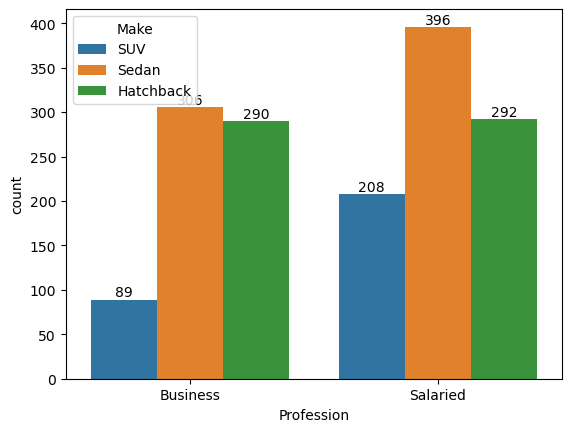

In [73]:
ax = sns.countplot(x=df_new.Profession,hue=df.Make)
for i in ax.containers:
    ax.bar_label(i,)

In [74]:
Likelihood1 = (208 / (208+396+292)*100)
Likelihood2 = (396 / (208+396+292)*100)
Likelihood3 = (292 / (208+396+292)*100)
print("Likelihood of Salaried person buying SUV is ",Likelihood1)
print("Likelihood of Salaried person buying Sedan is ",Likelihood2)
print("Likelihood of Salaried person buying Hatchback is", Likelihood3)

Likelihood of Salaried person buying SUV is  23.214285714285715
Likelihood of Salaried person buying Sedan is  44.19642857142857
Likelihood of Salaried person buying Hatchback is 32.589285714285715


From the above chart, it is clear that the salaried person is more likely to buy a sedan

### 1.4.3 What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [75]:
df_Male_customers = df_new[df_new.Gender=='Male']

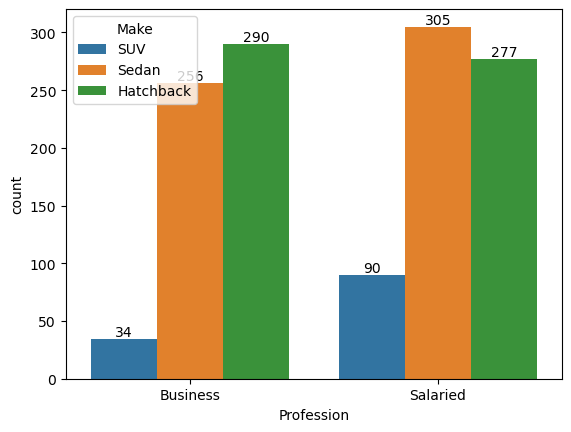

In [76]:
ax = sns.countplot(x=df_Male_customers.Profession,hue=df.Make)
for i in ax.containers:
    ax.bar_label(i,)

In [77]:
suv = (90 / (90+305+277)*100)
sedan = (305 / (90+305+277)*100)
hatchback = (277 / (90+305+277)*100)
print("Likelihood of Salaried person buying SUV is ",suv)
print("Likelihood of Salaried person buying Sedan is ",sedan)
print("Likelihood of Salaried person buying Hatchback is", hatchback)

Likelihood of Salaried person buying SUV is  13.392857142857142
Likelihood of Salaried person buying Sedan is  45.38690476190476
Likelihood of Salaried person buying Hatchback is 41.220238095238095


From the above results it is clear that Salaried Males prefer Sedan and not SUV which is not as per Sheldon Cooper's claim

### 1.4.4  How does the amount spent on purchasing automobiles vary by gender?

<Axes: xlabel='Gender', ylabel='Price'>

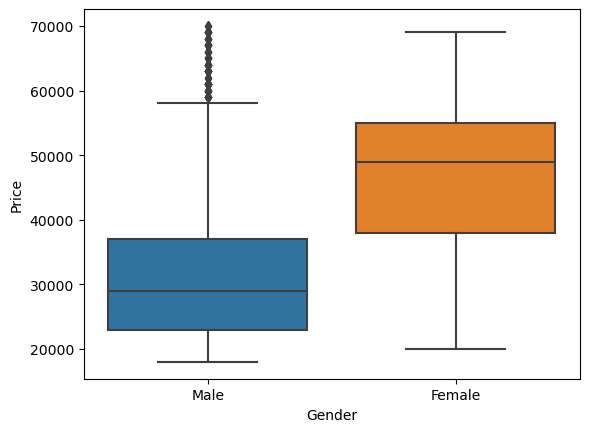

In [78]:
sns.boxplot(x=df_new.Gender,y=df_new.Price)

In [91]:
df_new.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

In [92]:
df_new.groupby(['Gender'])['Price'].median()

Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64

The amount spent by females is more compared to males as the mean and median price is higher

### 1.4.5 How much money was spent on purchasing automobiles by individuals who took a personal loan?

<Axes: xlabel='Personal_loan', ylabel='Price'>

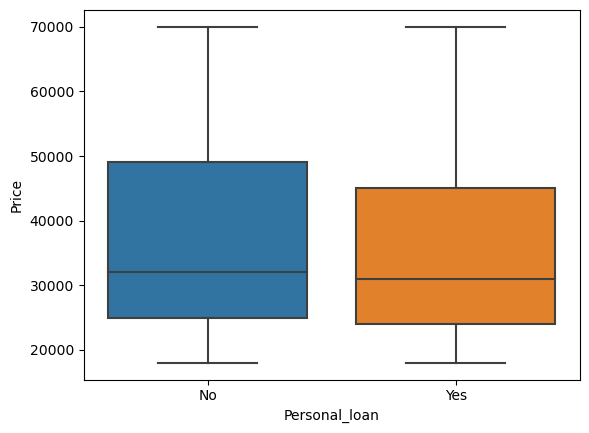

In [81]:
sns.boxplot(x=df_new.Personal_loan,y=df_new.Price)

In [93]:
Mean_Personal_loan = df_new.groupby(['Personal_loan'])['Price'].mean()
Median_Personal_loan = df_new.groupby(['Personal_loan'])['Price'].median()


In [94]:
print("Mean Personal Loan is : ",Mean_Personal_loan)
print("Median Personal Loan is : ",Median_Personal_loan)

Mean Personal Loan is :  Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64
Median Personal Loan is :  Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64


The mean and median is higher for people who brought a car without a personal loan

### 1.4.6 How does having a working partner influence the purchase of higher-priced cars?

In [96]:
Mean_PW = df_new.groupby(['Partner_working'])['Price'].mean()
Median_PW = df_new.groupby(['Partner_working'])['Price'].median()

In [97]:
print("Mean Partner Working is : ",Mean_PW)
print("Median Partner Working is : ",Median_PW)

Mean Partner Working is :  Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64
Median Partner Working is :  Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64


There is no impact on purchase made by a customer if the partner is working or not as the mean and median values looks almost the same.

# 1.5  Actionable Insights & Recommendations

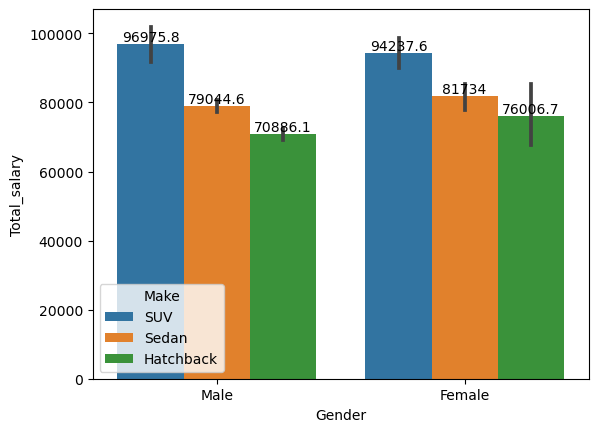

In [129]:
ax=sns.barplot(x=df_new.Gender,y=df_new.Total_salary,hue=df_new.Make)
for i in ax.containers:
    ax.bar_label(i,)

In [99]:
df_new.groupby(['Gender','Marital_status'])['Price'].mean()

Gender  Marital_status
Female  Married           47918.566775
        Single            44727.272727
Male    Married           32525.528169
        Single            31344.827586
Name: Price, dtype: float64

In [102]:
df_new.groupby(['Gender','Marital_status'])['Make'].agg(pd.Series.mode)

Gender  Marital_status
Female  Married                 SUV
        Single                Sedan
Male    Married               Sedan
        Single            Hatchback
Name: Make, dtype: object

# Problem 2 - Framing Analytics Problem

## Analyse the dataset and list down the top 5 important variables, along with the business justifications.

In [103]:
df1 = pd.read_excel('godigt_cc_data.xlsx')

In [104]:
df1.head(5)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-